In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
class DiscreteSignal:

    def __init__(self, INF=5, values=None,start_impulse=None):
        """Initializes the signal in a given range(-INF,INF)."""
        self.INF = INF  # object -> attributes
        self.start_impulse = start_impulse
        if values is None:
            self.values = np.zeros((2 * self.INF + 1), dtype=float)
        else:
            self.values = values

    def set_value_at_time(self, time, value):
        """Sets the value of the signal at a specific time index."""
        if (-self.INF) <= time <= (self.INF):
            self.values[time + self.INF] = value
        else:
            raise IndexError("Time index is out of bound")

    def shift_signal(self, shift):
        """Returns a new DiscreteSignal instance with the shifted signal x[n - shift]."""
        # rolled and trimmed the shifted values
        shifted_values = np.roll(self.values, shift)
        if shift >= 0:
            shifted_values[:shift:] = 0
        else:
            shifted_values[shift::] = 0

        return DiscreteSignal(self.INF, shifted_values)

    def add(self, other):
        """Returns a new DiscreteSignal instance representing the sum of two signals."""
        # added the values of two signal
        if self.INF != other.INF:
            raise ValueError("signals must be in  same range to add up")

        added_values = self.values + other.values

        return DiscreteSignal(self.INF, added_values)

    def multiply(self, other):
        """Returns a new DiscreteSignal instance representing element-wise multiplication."""
        if self.INF != other.INF:
            raise ValueError("signals must be in  same range to add up")
        # multiplied signal
        multiplied_values = self.values * other.values

        return DiscreteSignal(self.INF, multiplied_values)

    def multiply_const_factor(self, scaler):
        """Returns a new DiscreteSignal instance with the signal multiplied by a constant factor."""
        # values multiplied by a const factor
        multiplied_by_const_values = self.values * scaler

        return DiscreteSignal(self.INF, multiplied_by_const_values)

    def plot(self, figsize=(8, 3), y_range=(-1, 3), title=None, x_label='n (Time Index)', y_label='x[n]', saveTo=None):
        """Plots the signal using matplotlib."""
        # create a new figure
        plt.figure(figsize=figsize)
        # set x-axis ticks
        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        # set y-axis range
        y_range = (y_range[0], max(np.max(self.values), y_range[1]) + 1)
        plt.ylim(*y_range)
        # plot the signal (X,Y)
        plt.stem(np.arange(-self.INF, self.INF + 1, 1), self.values)

        # set title
        plt.title(title)
        # set x_label
        plt.xlabel(x_label)
        # set y_label
        plt.ylabel(y_label)
        # add grid to the plot
        plt.grid(True)

        # save plotted graph to the path
        if saveTo is not None:
            plt.savefig(saveTo)

        plt.show()

    # Extra helper functions
    def set_values(self, values):
        """Sets multiple values at once."""
        if len(values) == len(self.values):
            self.values = values
        else:
            raise ValueError("Values array must match the length of current signal.")

    def __str__(self):
        return f"The signal  values are {self.values} in range {- self.INF} to {self.INF}"



The signal  values are [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] in range -5 to 5


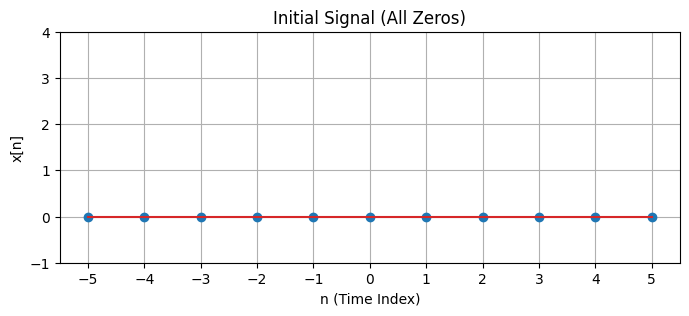

In [19]:
    # Test Case 1: Initialize a signal
    INF = 5
    signal = DiscreteSignal(INF)
    print(signal)
    signal.plot(title="Initial Signal (All Zeros)")

The signal  values are [0.  0.  0.  3.  5.  0.  0.  0.  0.  0.  1.5] in range -5 to 5


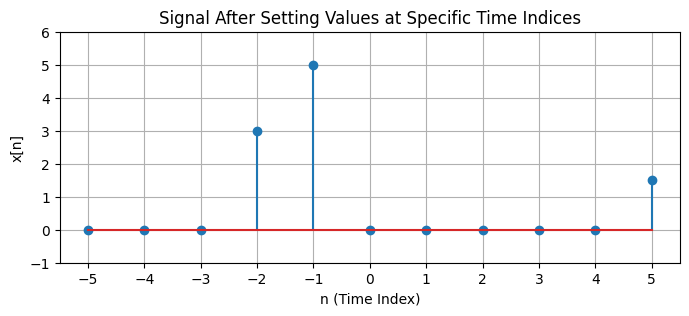

In [20]:

    # Test Case 2: Set values at specific time indices
    signal.set_value_at_time(-2, 3)
    signal.set_value_at_time(-1,5)
    signal.set_value_at_time(5,1.5)
    print(signal)
    signal.plot(title="Signal After Setting Values at Specific Time Indices")


The signal  values are [5.  0.  0.  0.  0.  0.  1.5 0.  0.  0.  0. ] in range -5 to 5


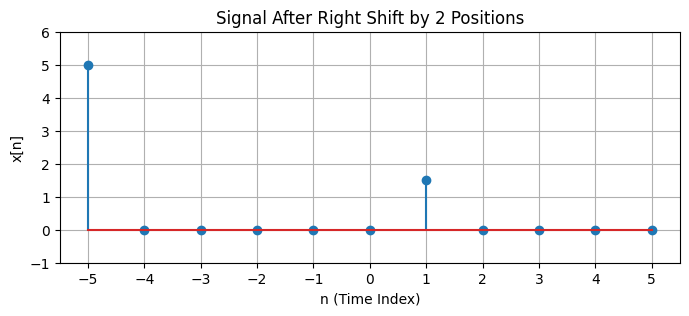

In [21]:
# Test Case 3: Right shift the signal by 2 positions
shifted_signal = signal.shift_signal(-4)
print(shifted_signal)  # Values should be shifted to the right by 2, with zeros filling in on the left
shifted_signal.plot(title="Signal After Right Shift by 2 Positions")


The signal  values are [0.  0.  0.  7.  8.  0.  7.  0.  0.  0.  1.5] in range -5 to 5


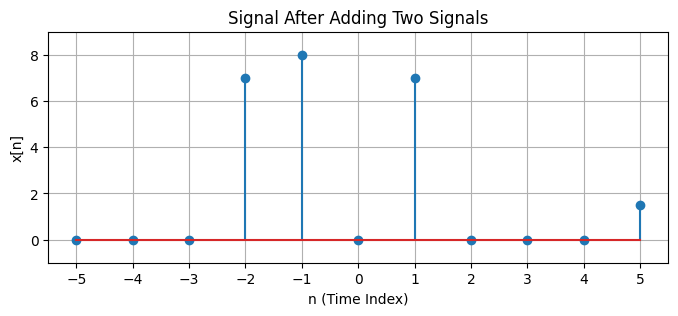

In [22]:
# Test Case 4: Add two signals
signal2 = DiscreteSignal(INF)
signal2.set_value_at_time(-2,4)  # Set values at time indices 1 and -1
signal2.set_value_at_time(-1,3)
signal2.set_value_at_time(1,7)
added_signal = signal.add(signal2)
print(added_signal)  # Should be the sum of signal and signal2
added_signal.plot(title="Signal After Adding Two Signals")

The signal  values are [0. 0. 0. 4. 3. 0. 7. 0. 0. 0. 0.] in range -5 to 5
The signal  values are [ 0.  0.  0. 12. 15.  0.  0.  0.  0.  0.  0.] in range -5 to 5
[0. 0. 0. 4. 3. 0. 7. 0. 0. 0. 0.] [0.  0.  0.  3.  5.  0.  0.  0.  0.  0.  1.5]


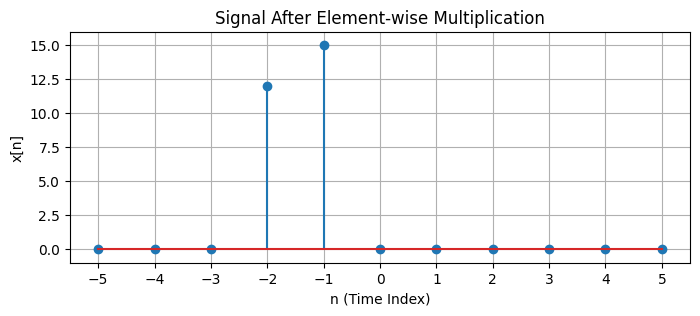

In [23]:
# Test Case 5: Multiply two signals element-wise
print(signal2)
multiplied_signal = signal.multiply(signal2)
print(multiplied_signal)  # Should show element-wise multiplication of signal and signal2
print(signal2.values,signal.values)
multiplied_signal.plot(title="Signal After Element-wise Multiplication")


The signal  values are [ 0.  0.  0.  6. 10.  0.  0.  0.  0.  0.  3.] in range -5 to 5


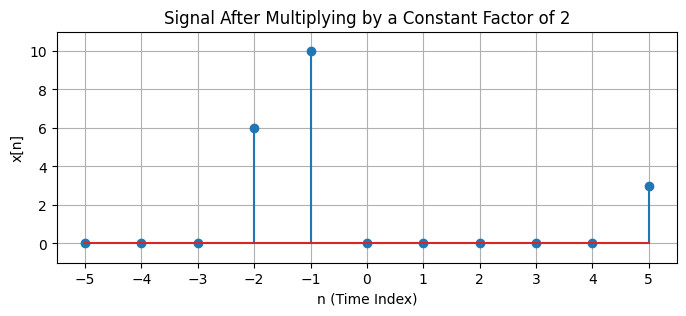

In [24]:
# Test Case 6: Multiply the signal by a constant factor of 2
scaled_signal = signal.multiply_const_factor(2)
print(scaled_signal)  # All values in the signal should be multiplied by 2
scaled_signal.plot(title="Signal After Multiplying by a Constant Factor of 2")